In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
from scipy.io import loadmat

# read data
# show data details

In [2]:
data = loadmat("D:\\most_wonted\\ai_projects\\classification\\data_set\\data3.mat")

print(data)
print('-' * 50)

print(type(data))
print('-' * 50)

print(type(data['X']))
print('-' * 50)

print(data['X'])
print('-' * 50)

print(data['X'].shape)
print('-' * 50)

print(data['y'].shape)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Oct 16 13:09:09 2011', '__version__': '1.0', '__globals__': [], 'X': array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), 'y': array([[10],
       [10],
       [10],
       ...,
       [ 9],
       [ 9],
       [ 9]], dtype=uint8)}
--------------------------------------------------
<class 'dict'>
--------------------------------------------------
<class 'numpy.ndarray'>
--------------------------------------------------
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
--------------------------------------------------
(5000, 400)
--------------------------------------------------
(5000, 1)


In [3]:
X = data['X']
Y = data['y']

print(X)
print(Y)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[10]
 [10]
 [10]
 ...
 [ 9]
 [ 9]
 [ 9]]


In [4]:
rows = data['X'].shape[0]
params = data['X'].shape[1]

print('rows = ' ,rows)
print('params = ' , params)

rows =  5000
params =  400


In [5]:
X = np.insert(X, 0, np.ones(rows), axis= 1)
print(X)

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


In [6]:
labels = np.unique(Y)
print(labels)

# labels = np.insert(labels, 0, values = [0], axis = 0)
# print(labels)


[ 1  2  3  4  5  6  7  8  9 10]


In [7]:
all_theata = np.zeros((labels.shape[0], params + 1))
print('all_theta \n' , all_theata)
print('all_theta shape \n' , all_theata.shape)

all_theta 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
all_theta shape 
 (10, 401)


In [8]:
X = np.matrix(X)
Y = np.matrix(Y)
all_theata = np.matrix(all_theata)


# Sigmoid Function

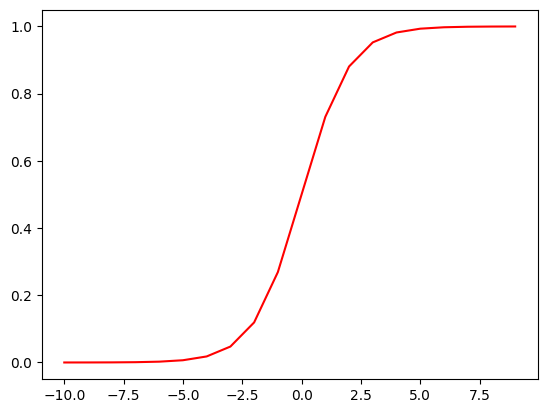

In [9]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

x = np.arange(-10, 10, step=1)
plt.plot(x, sigmoid(x), 'r')

# Cost function

In [10]:
def costReg(theata, X, Y, lamda):
    # we will reconvert theata to matrix on every recall because [[sp.optimize.fmin_tnc]] sends it as an array not matrix
    theata = np.matrix(theata)
    hx = sigmoid(X * theata.T)
    firstTerm = np.multiply(Y, np.log(hx))
    secondTerm = np.multiply((1-Y), np.log((1 - hx)))
    
    reg = (lamda/ len(X)) * np.sum(np.power(theata[:, 1: theata.shape[1]] , 2))

    return (-1 / len(X)) * np.sum(firstTerm + secondTerm) + reg

lamda = 0.0001
print(costReg(all_theata, X, Y, lamda))

1603.9425758157138


# GDfunction

In [11]:
def gradientDescent(theata, X, Y, lamda):
    # we will reconvert theata to matrix on every recall because [[sp.optimize.minimize]] sends it as an array not matrix
    theata = np.matrix(theata)

    parametersCount = int(theata.shape[1])
    valueThatWillBeAddedToTheata = np.matrix(np.zeros(parametersCount))

    hx = sigmoid(X * theata.T)
    error = hx - Y
    for i in range(parametersCount):
        term = np.multiply(error, X[:, i])
        # we will not subtract from old theata because [[sp.optimize.minimize]] will do it
        # just compute the new value to be added
        if(i == 0):
            valueThatWillBeAddedToTheata[0,i] = (np.sum(term) / len(X))
        else:
            valueThatWillBeAddedToTheata[0,i] = (np.sum(term)/len(X)) + ((lamda/len(X))* theata[:,i])

            
    return valueThatWillBeAddedToTheata

def gradientDescent_without_loop(theata, X, y, lamda):
    error = sigmoid(X * theata.T)- y
    grad = ((X.T * error) / len(X)).T + ((lamda / len(X)) * theata)
    # intercept gradient is not regularized
    grad[0, 0] = np.sum(np.multiply(error, X[:,0])) / len(X)
    return np.array(grad).ravel()

# applying one_vs_all techniuqe

In [12]:
def one_vs_all(X, Y, all_theata, labels, lamda):
    
    for i in labels:
        y_i = np.array([1 if label == i else 0  for label in Y])

        # converting array to matrix with same shape 'or same dimintions'
        y_i = np.reshape(y_i, (rows, 1))
        
        theta = np.zeros(params + 1)
        fmin = sp.optimize.minimize(fun= costReg, x0 = theta, args=(X, y_i, lamda), method='TNC', jac= gradientDescent)
        all_theata[i-1,:] = fmin.x

    return all_theata

all_theata = one_vs_all(X, Y, all_theata, labels, lamda)
print(all_theata)

C:\Users\hasme\AppData\Local\Temp\ipykernel_18808\835476707.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  valueThatWillBeAddedToTheata[0,i] = (np.sum(term)/len(X)) + ((lamda/len(X))* theata[:,i])
C:\Users\hasme\AppData\Local\Temp\ipykernel_18808\3046477439.py:6: RuntimeWarning: divide by zero encountered in log
  secondTerm = np.multiply((1-Y), np.log((1 - hx)))
C:\Users\hasme\AppData\Local\Temp\ipykernel_18808\3046477439.py:6: RuntimeWarning: invalid value encountered in multiply
  secondTerm = np.multiply((1-Y), np.log((1 - hx)))


[[-5.00367318e+00  0.00000000e+00  0.00000000e+00 ...  1.28339092e-02
   2.87614933e-07  0.00000000e+00]
 [-5.51510433e+00  0.00000000e+00  0.00000000e+00 ...  6.97668600e-02
  -7.13610804e-03  0.00000000e+00]
 [-7.41701089e+00  0.00000000e+00  0.00000000e+00 ... -2.46627725e-04
  -9.51467433e-07  0.00000000e+00]
 ...
 [-1.21416208e+01  0.00000000e+00  0.00000000e+00 ... -2.40527804e-01
   2.77681978e-02  0.00000000e+00]
 [-8.23487514e+00  0.00000000e+00  0.00000000e+00 ... -1.10957899e-01
   7.35052185e-03  0.00000000e+00]
 [-1.21914079e+01  0.00000000e+00  0.00000000e+00 ...  1.14184174e-03
   5.06954001e-05  0.00000000e+00]]


In [13]:

def predict_all(X, all_theta):
 
    # compute the class probability for each class on each training instance
    h =sigmoid(X * all_theta.T)
    print(h.shape)

    # create array of the index with the maximum probability
    h_argmax = np.argmax(h, axis=1)
    print(h_argmax.shape)

    # because our array was zero-indexed we need to add one for the true label prediction
    h_argmax = h_argmax + 1
    

    return h_argmax

y_pred = predict_all(X, all_theata)
print(y_pred)
correct = [1 if a == b else 0 for (a, b) in zip(y_pred, data['y'])]
accuracy = (sum(map(int, correct)) / float(len(correct)))
print ('accuracy = {0}%'.format(accuracy * 100))


(5000, 10)
(5000, 1)
[[10]
 [10]
 [10]
 ...
 [ 9]
 [ 9]
 [ 9]]
accuracy = 97.48%
